Original data:     [0, 1, 0, 0, 1, 1, 0, 1]
Demodulated data:  [0, 1, 0, 0, 1, 1, 0, 1]


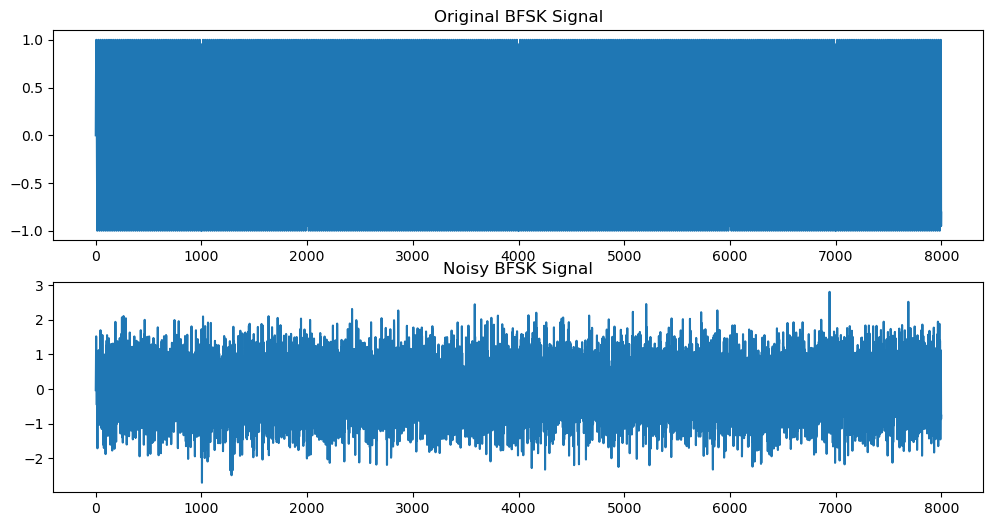

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Parameters
fs = 44100  # Sampling frequency
T = 1/200  # Symbol duration in seconds
f0 = 1000  # Frequency for binary 0
f1 = 2000  # Frequency for binary 1
amplitude = 1  # Signal amplitude

def generate_bfsk_signal(data, f0, f1, fs, T, amplitude):
    t = np.arange(0, T, 1/fs)
    signal = np.array([])
    for bit in data:
        if bit == 0:
            signal = np.concatenate((signal, amplitude * np.sin(2 * np.pi * f0 * t)))
        else:
            signal = np.concatenate((signal, amplitude * np.sin(2 * np.pi * f1 * t)))
    return signal

# BFSK demodulation
def bfsk_demodulation(signal, f0, f1, fs, T):
    t = np.arange(0, T, 1/fs)
    reference0 = np.sin(2 * np.pi * f0 * t)
    reference1 = np.sin(2 * np.pi * f1 * t)
    
    num_samples_per_symbol = int(fs * T)
    num_symbols = len(signal) // num_samples_per_symbol
    demodulated_data = []
    
    for i in range(num_symbols):
        symbol = signal[i * num_samples_per_symbol : (i + 1) * num_samples_per_symbol]
        correlation0 = correlate(symbol, reference0)
        correlation1 = correlate(symbol, reference1)
        
        if max(correlation0) > max(correlation1):
            demodulated_data.append(0)
        else:
            demodulated_data.append(1)
    
    return demodulated_data

# Example data
data = [0, 1, 0, 0, 1, 1, 0, 1]
signal = generate_bfsk_signal(data, f0, f1, fs, T, amplitude)

# Add noise
noise = np.random.normal(0, 0.5, len(signal))
noisy_signal = signal + noise

# Demodulate the signal
demodulated_data = bfsk_demodulation(noisy_signal, f0, f1, fs, T)

# Display results
print("Original data:    ", data)
print("Demodulated data: ", demodulated_data)

# Plot the original and noisy signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title("Original BFSK Signal")
plt.subplot(2, 1, 2)
plt.plot(noisy_signal)
plt.title("Noisy BFSK Signal")
plt.show()
